In [61]:
import pint
from pint import Unit
from scipy import constants
import numpy as np
from matplotlib import pyplot as plt
from open_atmos_jupyter_utils import show_plot

si = pint.UnitRegistry()

## Calculate concentration distribution

In [62]:
# def c(
#     x: np.ndarray,
#     t: np.ndarray,
#     M: float = 1.0 * si.kg,
#     A: float = 1.0 * si.m**3 / si.s,
#     D: float = 1.0 * si.m**2 / si.s,
#     U: float = 1.0 * si.m / si.s
# ) -> np.ndarray:
#     """
#     Args:
#         x: Position array [length]
#         t: Time array [time]
#         M: Total substance amount [moles]
#         A: Cross-sectional area [length^2]
#         D: Diffusion coefficient [length^2/time]
#         U: Velocity [length/time]
    
#     Returns:
#         Concentration array [moles/length^3]
#     """
#     x_ext = np.array([x] * len(t)) * x.units
#     t_ext = np.array([t] * len(x)).T * t.units

#     return M / (A * 2 * np.sqrt(np.pi * D)) * x_ext / t_ext ** 1.5 * np.exp(-(U * t_ext - x_ext) ** 2 / (4 * D * t_ext))

In [ ]:
def c(
    x: np.ndarray,
    t: np.ndarray,
    M: float = 1.0 * si.kg,
    A: float = 1.0 * si.m**3 / si.s,
    D: float = 1.0 * si.m**2 / si.s,
    U: float = 1.0 * si.m / si.s,
) -> np.ndarray:
    """
    Args:
        x: Position array [length]
        t: Time array [time]
        M: Total substance amount [moles]
        A: Cross-sectional area [length^2]
        D: Diffusion coefficient [length^2/time]
        U: Velocity [length/time]

    Returns:
        Concentration array [moles/length^3]
    """
    X, T = np.meshgrid(x.magnitude, t.magnitude)
    X = X * x.units
    T = T * t.units

    return (
        M
        / (A * 2 * np.sqrt(np.pi * D))
        * X
        / T**1.5
        * np.exp(-((U * T - X) ** 2) / (4 * D * T))
    )

## Plots

In [64]:
si.setup_matplotlib()

/var/folders/8p/ctsxm4l530g0pklqbwhg1fg00000gn/T/ipykernel_3168/1444069652.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


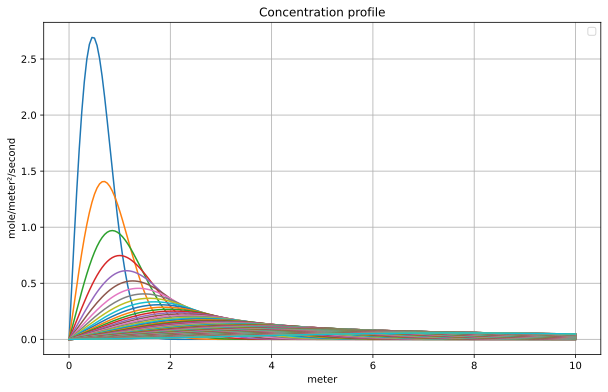

In [ ]:
x = np.linspace(0, 10, 200) * si.m
t = np.linspace(0.1, 10, 100) * si.s

concentration = c(
    x, t, M=1.0 * si.mol, A=1.0 * si.m**2, D=1.0 * si.m**2 / si.s, U=0.5 * si.m / si.s
)

fig = plt.figure(figsize=(10, 6))
for i, tau in enumerate(t):
    plt.plot(x, concentration[i])
plt.title("Concentration profile")
plt.legend()
plt.grid()
show_plot(fig=fig)